# Variability Statistics

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.cm as cm

In [12]:
clean_path = r"c:\Users\jhzhe\Cloned_Repos\MPhys-Project\output_data\atlas_query\output\neutrino_139939\neutrino_139939_8268246_galaxy0\neutrino_139939_8268246_galaxy0.c.clean.lc.txt"
avg_path = r"c:\Users\jhzhe\Cloned_Repos\MPhys-Project\output_data\atlas_query\output\neutrino_139939\neutrino_139939_8268246_galaxy0\neutrino_139939_8268246_galaxy0.c.4.00days.lc.txt"
df = pd.read_csv(avg_path, delim_whitespace=True)
filtered_df = df[(df['uJy'].notna()) & (df['MJD'].notna())]
filtered_df.head()

C:\Users\jhzhe\AppData\Local\Temp\ipykernel_11068\307341054.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(avg_path, delim_whitespace=True)


,MJD,MJDbin,uJy,duJy,stdev,x2,Nclip,Ngood,Nexcluded,Mask,m,dm
0,60533.833902,60534.0,12.057076,4.155509,11.382160,0.939286,0,8,0,0x0000,20.426039,NaN
7,60561.136340,60562.0,-1.559105,6.235014,17.795130,1.915603,0,4,0,0x0000,20.720103,NaN
12,60583.204278,60582.0,1.987733,6.299305,6.652067,0.272518,0,4,0,0x0000,20.600380,NaN
13,60585.512061,60586.0,-1.666257,3.988479,13.466007,1.662578,1,7,0,0x0000,21.205179,NaN
14,60588.515290,60590.0,-0.986735,5.833058,15.033296,1.759076,0,4,0,0x0000,20.792456,NaN


In [22]:
def features(dataframe, flux_column='uJy'):
    N = len(dataframe)
    mean_flux = dataframe[flux_column].mean()
    mean_flux_squared = (dataframe[flux_column]**2).mean()
    std_flux = dataframe[flux_column].std()

    weights = 1 / (dataframe['stdev'] ** 2)

    weighted_mean = np.sum(dataframe[flux_column] * weights) / np.sum(weights)

    chi_squared = (1 / (N - 1)) * np.sum((dataframe[flux_column] - weighted_mean)**2 / (dataframe['stdev']**2))

    V_v = (1 / mean_flux) * np.sqrt((N / (N-1)) * (mean_flux_squared - mean_flux**2))

    return mean_flux, std_flux, weighted_mean, chi_squared, V_v

def txt_finder(atlas_txt_dir, colour, avg):
    '''
    Finds the appropiate cleaned+averaged txt file for lightcurves
    '''
    txt_files = []
    for root, dirs, files in os.walk(atlas_txt_dir):
        for file in files:
            if file.endswith(f'{colour}.{avg}.00days.lc.txt'):
                txt_files.append(os.path.join(root, file))

    if txt_files:
        #logging.info(f'{txt_files}')
        return txt_files
    else:
        #logging.info('no light curve data processed')
        return

In [26]:
atlas_output_dir = r'/users/jhzhe/Cloned_Repos/MPhys-Project/output_data/atlas_query/output'
c_txt = txt_finder(atlas_txt_dir=atlas_output_dir, colour='c',avg=4)
o_txt = txt_finder(atlas_txt_dir=atlas_output_dir, colour='o', avg=4)

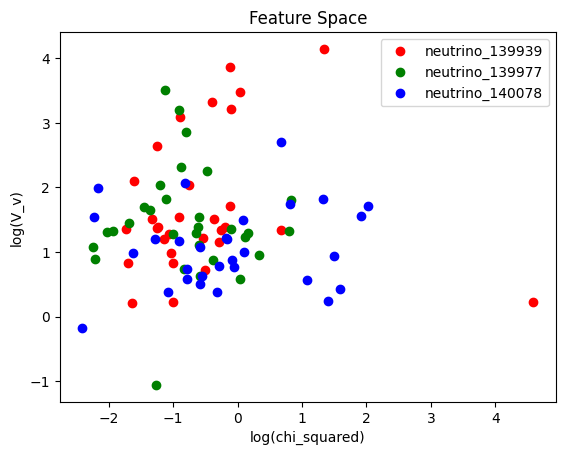

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colours = ['r', 'g', 'b']
files = sorted(c_txt, key=lambda x: int(x.split("galaxy")[-1].split('.')[0]))
grouped_files = {}

# Group files by neutrino ID
for file in files:
    # Extract the neutrino ID (e.g., neutrino_139939)
    path_parts = file.replace("\\", "/").split("/")
    neutrino_id = next(part for part in path_parts if part.startswith("neutrino") and "_galaxy" not in part)
    if neutrino_id not in grouped_files:
        grouped_files[neutrino_id] = []
    grouped_files[neutrino_id].append(file)

# Plot data with unique colors and labels
for idx, (id, files) in enumerate(grouped_files.items()):
    for file in files:
        df = pd.read_csv(file, sep=r'\s+')
        filtered_df = df[(df['uJy'].notna()) & (df['MJD'].notna())]
        mean_flux, std_flux, weighted_mean, chi_squared, V_v = features(filtered_df)

        plt.plot(
            np.log(chi_squared),
            np.log(np.absolute(V_v)),
            'o',
            color=colours[idx % len(colours)],  # Use modulo to avoid index overflow cool trick
            label=id if file == files[0] else ""  # Only label the first point for each ID
        )

# Add legend
plt.legend(loc='best')
plt.xlabel('log(chi_squared)')
plt.ylabel('log(V_v)')
plt.title('Feature Space')
plt.show()

# large chi_squared means significance deviation from the mean
# large V_v is the amplitude of variability


In [19]:
print(np.log(V_v))
print(np.log(chi_squared))

0.2165818695795695
-1.6388611099405965
